In [2]:
import numpy as np
import h5py

In [15]:
train_dataset = h5py.File('C:/Users/feroz/Documents/DeepLearn/Optimisation_Techniques/neuralnet_dataset/train_catvnoncat.h5', "r")
test_dataset = h5py.File('C:/Users/feroz/Documents/DeepLearn/Optimisation_Techniques/neuralnet_dataset/test_catvnoncat.h5', "r")

print("Keys: %s" % train_dataset.keys())
print(train_dataset["train_set_x"])
X = np.array(train_dataset["train_set_x"])
print("X.shape = "+str(X.shape))
y = np.array(train_dataset["list_classes"])
print("Output classes = "+str(y))

Keys: <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
X.shape = (209, 64, 64, 3)
Output classes = [b'non-cat' b'cat']


In [23]:
""" Now we have the image in the form of dimension (m,w,h,c) but the model will accept parameters in dimension
(m,n) so we will flatten this numpy array to convert to this dimension

"""


' Now we have the image in the form of dimension (m,w,h,c) but the model will accept parameters in dimension\n(m,n) so we will flatten this numpy array to convert to this dimension\n\n'

In [64]:
train_set_X_orig = np.array(train_dataset["train_set_x"]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"]) # your train set labels
test_set_X_orig = np.array(test_dataset["test_set_x"]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"]) # your test set labels

print("Printing the dimensions of data before Flattening")

print("train_set_X_orig shape = "+ str(train_set_X_orig.shape))
print("train_set_y_orig shape = "+ str(train_set_y_orig.shape))
print("test_set_X_orig shape = " + str(test_set_X_orig.shape))
print("test_set_y_orig shape = " + str(test_set_y_orig.shape))

train_set_X_flatten = train_set_X_orig.reshape(train_set_X_orig.shape[0],-1).T
train_set_y_flatten = train_set_y_orig.reshape(1,-1)
test_set_X_flatten = test_set_X_orig.reshape(test_set_X_orig.shape[0],-1).T
test_set_y_flatten = test_set_y_orig.reshape(1,-1)

print("Printing the dimensions of data after Flattening")

print("train_set_X_flatten shape = " + str(train_set_X_flatten.shape))
print("train_set_y_flatten shape = " + str(train_set_y_flatten.shape))
print("test_set_X_flatten shape = " + str(test_set_X_flatten.shape))
print("test_set_y_flatten shape = " + str(test_set_y_flatten.shape))

train_set_x = train_set_X_flatten / 255
test_set_x = test_set_X_flatten / 255


Printing the dimensions of data before Flattening
train_set_X_orig shape = (209, 64, 64, 3)
train_set_y_orig shape = (209,)
test_set_X_orig shape = (50, 64, 64, 3)
test_set_y_orig shape = (50,)
Printing the dimensions of data after Flattening
train_set_X_flatten shape = (12288, 209)
train_set_y_flatten shape = (1, 209)
test_set_X_flatten shape = (12288, 50)
test_set_y_flatten shape = (1, 50)


In [22]:
"""Let us see how the images look like which we want to use to train a model that will distinguish between 
cat and non cat"""

'Let us see how the images look like which we want to use to train a model that will distinguish between \ncat and non cat'

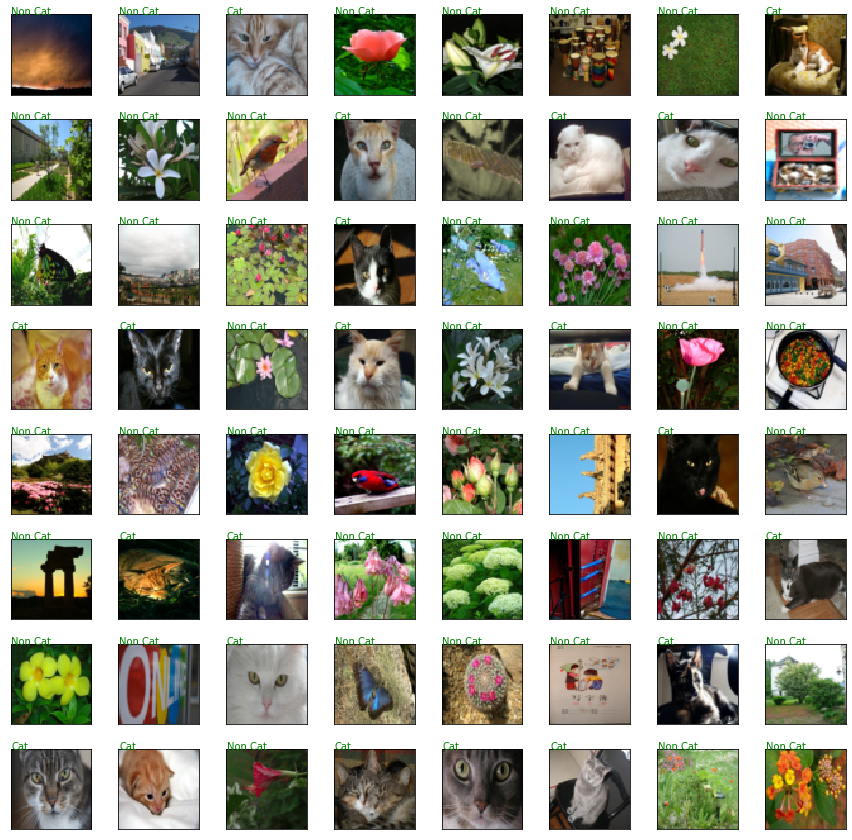

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(8, 8, figsize=(15,15),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.3, wspace=0.3))
k=0
for i in range(8):
      for j in range(8):
        ax[i,j].imshow(train_set_X_orig[k,], cmap='binary', interpolation='nearest')
        ax[i,j].text(.05,.05, "Cat" if (train_set_y_orig[k] == 1)  else "Non Cat" , color='green')
        k+=1







In [29]:
# defining sigmoid function that will help as activation function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s


In [31]:
def initialize_with_zeros(dim):
    w=np.zeros(shape=(dim,1))
    b=0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return (w,b)

In [32]:
def propagate(w,b,X,Y):
    # forward propagation and compute output and cost
    m = X.shape[1] # determine the number of training items 
    A = sigmoid(np.dot(w.T, X) + b)  # compute output using sigmoid activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) 
    # backward propagation, compute dz and da 
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [33]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" % (i, cost))
    
        params = {"w": w,
                  "b": b}
    
        grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [34]:
def initialise_parameters(layer_dims):
    parameters = {}
    for i in range(layer_dims.shape[1]-1):
        parameters['W'+str(i+1)] = np.random.randn(layer_dims[i+1],layer_dims[i]) * 0.01
        parameters['b'+str(i+1)] = np.zeros(layer_dims[i+1])
    
    parameters['W'+str(layer_dims.shape[1])] = np.random.randn(1,layer_dims[layer_dims.shape[1]]) * 0.01
    parameters['b'+str(layer_dims.shape[1])] = np.zeros(1,1)
    

In [65]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [36]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m),dtype="int")
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872


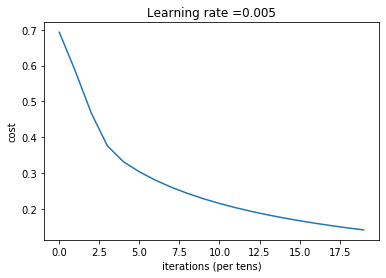

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [66]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

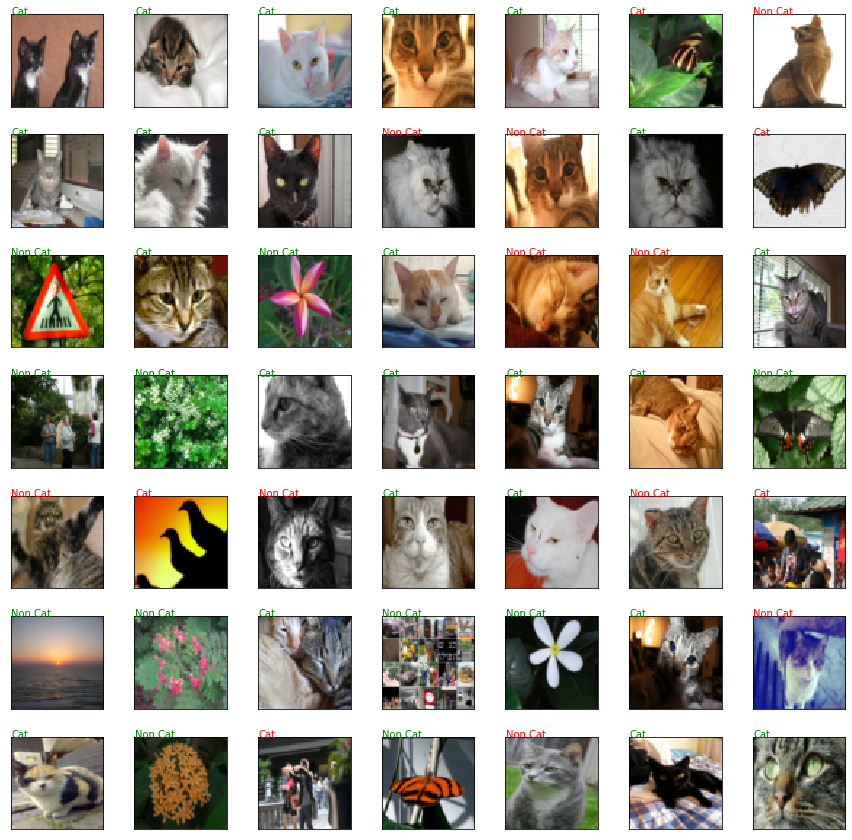

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(7, 7, figsize=(15,15),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.3, wspace=0.3))
k=0
for i in range(7):
      for j in range(7):
        ax[i,j].imshow(test_set_X_orig[k,], cmap='binary', interpolation='nearest')
        ax[i,j].text(.05,.05, "Cat" if (d['Y_prediction_test'][0][k] == 1)  else "Non Cat" , color='green' if(test_set_y_orig[k] == d['Y_prediction_test'][0][k]) else 'red')
        k+=1
